In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [6]:
data_folder = r"/Volumes/T7/data/gst-0112-26/Parallel_Search/Parallel_Search_Alpha_4_K2"
alpha_list = [0.025, 0.05, 0.075, 0.1]
g_fitness_across_alpha, s_fitness_across_alpha = [], []
g_breakthrough_across_alpha, s_breakthrough_across_alpha = [], []
g_diversity_across_alpha, s_diversity_across_alpha = [], []
g_variance_across_alpha, s_variance_across_alpha = [], []
for alpha in alpha_list:
    g_performance_file = data_folder + r"/g_ave_performance_across_size_alpha_{0}".format(alpha)
    s_performance_file = data_folder + r"/s_ave_performance_across_size_alpha_{0}".format(alpha)
    
    g_variance_file = data_folder + r"/g_variance_acros_size_alpha_{0}".format(alpha)
    s_variance_file = data_folder + r"/s_variance_acros_size_alpha_{0}".format(alpha)
    
    g_breakthrough_file = data_folder + r"/g_breakthrough_across_size_alpha_{0}".format(alpha)
    s_breakthrough_file = data_folder + r"/s_breakthrough_across_size_alpha_{0}".format(alpha)
    
    g_diversity_file = data_folder + r"/g_diversity_across_size_alpha_{0}".format(alpha)
    s_diversity_file = data_folder + r"/s_diversity_across_size_alpha_{0}".format(alpha)

    with open(g_performance_file, 'rb') as infile:
        g_fitness = pickle.load(infile)
    with open(s_performance_file, 'rb') as infile:
        s_fitness = pickle.load(infile)
    
    with open(g_variance_file, 'rb') as infile:
        g_variance = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)
        
    with open(g_breakthrough_file, 'rb') as infile:
        g_breakthrough = pickle.load(infile)
    with open(s_breakthrough_file, 'rb') as infile:
        s_breakthrough = pickle.load(infile)
        
    with open(g_diversity_file, 'rb') as infile:
        g_diversity = pickle.load(infile)
    with open(s_diversity_file, 'rb') as infile:
        s_diversity = pickle.load(infile)
        
    g_fitness_across_alpha.append(g_fitness)
    s_fitness_across_alpha.append(s_fitness)
    
    g_breakthrough_across_alpha.append(g_breakthrough)
    s_breakthrough_across_alpha.append(s_breakthrough)
    
    g_diversity_across_alpha.append(g_diversity)
    s_diversity_across_alpha.append(s_diversity)

    g_variance_across_alpha.append(g_variance)
    s_variance_across_alpha.append(s_variance)

print(np.array(g_breakthrough_across_alpha, dtype=object).shape)
# print(np.array(g_fitness_across_K_size, dtype=object).shape)

(4, 9)


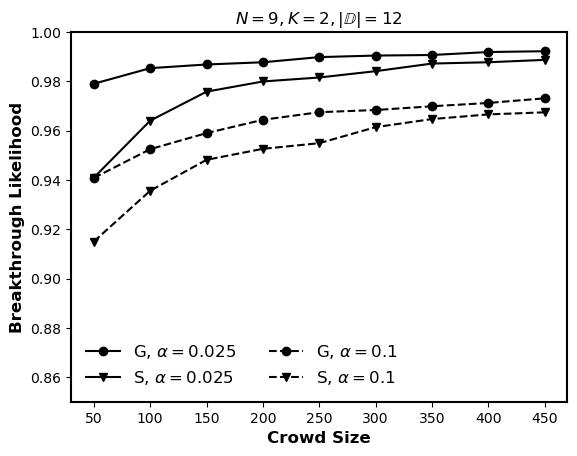

In [9]:
# GS Best Fitness Given the Same K and Varying Agent Numbers
agent_num_list = np.arange(50, 500, step=50, dtype=int).tolist()

x = agent_num_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_breakthrough_across_alpha[0], marker='o', linestyle='-', label="G, $\\alpha=0.025$", color="k")
plt.plot(x, s_breakthrough_across_alpha[0], marker='v', linestyle='-', label="S, $\\alpha=0.025$", color="k")

plt.plot(x, g_breakthrough_across_alpha[-1], marker='o', linestyle='--', label="G, $\\alpha=0.1$", color="k")
plt.plot(x, s_breakthrough_across_alpha[-1], marker='v', linestyle='--', label="S, $\\alpha=0.1$", color="k")

plt.xlabel('Crowd Size', fontweight='bold', fontsize=12)
plt.ylabel('Breakthrough Likelihood', fontweight='bold', fontsize=12)
plt.ylim(0.85, 1.00)
plt.title(r"$N=9, K=2, |\mathbb{D}|=12$")  # use the raw string "r"
plt.legend(frameon=False, ncol=2, fontsize=12)
plt.savefig(data_folder + r"/breakthrough_across_alpha.png", transparent=True, dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/T7/data/gst-0112-26/Parallel_Search/Parallel_Search_Alpha_4_K2/Results/parallel_search_diversity.png'

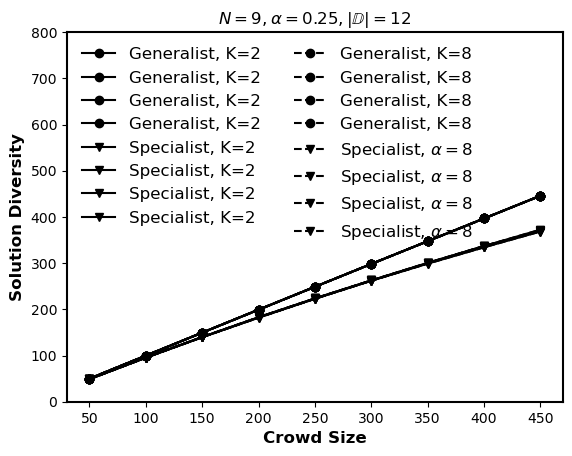

In [8]:
# GS Diversity Given the Same K and Varying Agent Numbers
# print(g_diversity_across_K_size)
g_diversity_across_size_K = []
s_diversity_across_size_K = []
for index in range(9):
    g_diversity_across_size, s_diversity_across_size = [], []
    for g_diversity, s_diversity in zip(g_diversity_across_alpha, s_diversity_across_alpha):
        g_diversity_across_size.append(g_diversity[index])
        s_diversity_across_size.append(s_diversity[index])
    g_diversity_across_size_K.append(g_diversity_across_size)
    s_diversity_across_size_K.append(s_diversity_across_size)
# print(g_diversity_across_size_K)
x = agent_num_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_diversity_across_size_K, marker='o', linestyle='-', label="Generalist, K=2", color="k")
plt.plot(x, s_diversity_across_size_K, marker='v', linestyle='-', label="Specialist, K=2", color="k")

plt.plot(x, g_diversity_across_size_K, marker='o', linestyle='--', label="Generalist, K=8", color="k")
plt.plot(x, s_diversity_across_size_K, marker='v', linestyle='--', label="Specialist, $\\alpha=8$", color="k")

plt.xlabel('Crowd Size', fontweight='bold', fontsize=12)
plt.ylabel('Solution Diversity', fontweight='bold', fontsize=12)
plt.ylim(0, 800)
plt.title(r"$N=9, \alpha=0.25, |\mathbb{D}|=12$")
plt.legend(frameon=False, ncol=2, fontsize=12)
plt.savefig(data_folder + r"/Results/parallel_search_diversity", transparent=True, dpi=300)
plt.show()

In [8]:
# # GS Diversity Given the Same K and Varying Agent Numbers
# for index in range(9):
#     g_diversity_across_size, s_diversity_across_size = [], []
#     for g_diversity, s_diversity in zip(g_diversity_across_K_size, s_diversity_across_K_size):
#         g_diversity_across_size.append(g_diversity[index])
#         s_diversity_across_size.append(s_diversity[index])
#     g_diversity_across_size = [each / agent_num_list[j] for j, each in enumerate(g_diversity_across_size)]
#     s_diversity_across_size = [each / agent_num_list[j] for j, each in enumerate(s_diversity_across_size)]
#     x = agent_num_list
#     fig, ax = plt.subplots()
#     ax.spines["left"].set_linewidth(1.5)
#     ax.spines["right"].set_linewidth(1.5)
#     ax.spines["top"].set_linewidth(1.5)
#     ax.spines["bottom"].set_linewidth(1.5)
#     plt.plot(x, g_diversity_across_size, marker='o', linestyle='-', label="Generalist", color=nature_blue)
#     plt.plot(x, s_diversity_across_size, marker='s', linestyle='-', label="Specialist", color=nature_orange)
#     
#     plt.xlabel('Size', fontweight='bold', fontsize=12)
#     plt.ylabel('Uniqueness Proportion', fontweight='bold', fontsize=12)
#     # plt.ylim(0, 600)
#     plt.title("$K={0}$".format(index))
#     plt.legend(frameon=False, ncol=1, fontsize=12)
#     plt.savefig(data_folder + r"\GS_diversity_ratio_K_{0}.png".format(index), transparent=True, dpi=300)
#     plt.show()

In [9]:
# # Pair Wise Diversity Given the Same K and Varying Agent Numbers
# for index in range(9):
#     g_diversity_across_size, s_diversity_across_size = [], []
#     for g_diversity, s_diversity in zip(g_pair_wise_diversity_across_K_size, s_pair_wise_diversity_across_K_size):
#         g_diversity_across_size.append(g_diversity[index])
#         s_diversity_across_size.append(s_diversity[index])
#     x = agent_num_list
#     g_diversity_across_size = [a * b for a, b in zip(agent_num_list, g_diversity_across_size)]
#     s_diversity_across_size = [a * b for a, b in zip(agent_num_list, s_diversity_across_size)]
#     fig, ax = plt.subplots()
#     ax.spines["left"].set_linewidth(1.5)
#     ax.spines["right"].set_linewidth(1.5)
#     ax.spines["top"].set_linewidth(1.5)
#     ax.spines["bottom"].set_linewidth(1.5)
#     plt.plot(x, g_diversity_across_size, "v-", label="Generalist", color=nature_blue)
#     plt.plot(x, s_diversity_across_size, "s-", label="Specialist", color=nature_orange)
# 
#     plt.xlabel('Size', fontweight='bold', fontsize=12)
#     plt.ylabel('Diversity', fontweight='bold', fontsize=12)
#     # plt.xticks(x)
#     plt.title("$K={0}$".format(index))
#     plt.legend(frameon=False, ncol=1, fontsize=12)
#     plt.savefig(data_folder + r"\GS_pair_wise_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
#     plt.show()

In [10]:
# # Partial Unique Diversity Given the Same K and Varying Agent Numbers
# for index in range(9):
#     g_diversity_across_size, s_diversity_across_size = [], []
#     for g_diversity, s_diversity in zip(g_diversity_across_K_size, s_diversity_across_K_size):
#         g_diversity_across_size.append(g_diversity[index])
#         s_diversity_across_size.append(s_diversity[index])
#     x = agent_num_list
#     print(g_diversity_across_size)
#     # g_diversity_across_size = [b / a for a, b in zip(agent_num_list, g_diversity_across_size)]
#     # s_diversity_across_size = [b / a for a, b in zip(agent_num_list, s_diversity_across_size)]
#     fig, ax = plt.subplots()
#     ax.spines["left"].set_linewidth(1.5)
#     ax.spines["right"].set_linewidth(1.5)
#     ax.spines["top"].set_linewidth(1.5)
#     ax.spines["bottom"].set_linewidth(1.5)
#     plt.plot(x, g_diversity_across_size, "v-", label="Generalist", color=nature_blue)
#     plt.plot(x, s_diversity_across_size, "s-", label="Specialist", color=nature_orange)
# 
#     plt.xlabel('Size', fontweight='bold', fontsize=12)
#     plt.ylabel('Diversity', fontweight='bold', fontsize=12)
#     # plt.xticks(x)
#     plt.title("$K={0}$".format(index))
#     plt.legend(frameon=False, ncol=1, fontsize=12)
#     # plt.savefig(data_folder + r"\GS_partial_unique_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
#     plt.show()

In [11]:
# def get_unique_diversity(belief_pool: list):
#     unique_solutions = []
#     for belief in belief_pool:
#         string_belief = "".join(belief)
#         unique_solutions.append(string_belief)
#     unique_solutions = set(unique_solutions)
#     print(unique_solutions)
#     return len(unique_solutions)
# 
# solution_list = [["0", "1", "2", "3"], ["0", "1", "2", "3"], ["0", "1", "2", "3"], ["0", "1", "2", "2"]]
# uniqueness = get_unique_diversity(belief_pool=solution_list)
# print(uniqueness)